# **Support Vector Machine**

**Load Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('../Datasets/SVM-main-data/Social_Network_Ads.csv').drop(columns=['User ID'])
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


**Show Target Values**

In [2]:
# Extract the values of the 'Purchased' column
target_values = data['Purchased'].values
# Print the target values
np.unique(target_values)

array([0, 1], dtype=int64)

**Count the values of 'Purchased'**

In [3]:
# count Purchased values
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

**Data Type of Columns**

In [4]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

**Factorize**

In [5]:
# 0 for Male & 1 for Female
data['Gender_into_nums'] = pd.factorize(data.Gender)[0]

**Swapping**

In [6]:
titles = list(data.columns)
titles

['Gender', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_into_nums']

In [7]:
titles[3], titles[4] = titles[4], titles[3]
titles[2], titles[3] = titles[3], titles[2]
titles[1], titles[2] = titles[2], titles[1]

In [8]:
titles

['Gender', 'Gender_into_nums', 'Age', 'EstimatedSalary', 'Purchased']

In [9]:
data = data[titles].drop(columns=['Gender'])
data.head()

,Gender_into_nums,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


**Check for missing values**

In [10]:
data.isnull().sum()

Gender_into_nums    0
Age                 0
EstimatedSalary     0
Purchased           0
dtype: int64

**Correlation Matrix**

In [11]:
# get the correlation matrix
corr_matrix = data.corr()[['Purchased']].sort_values(
    by='Purchased', ascending=False)

# display the correlation matrix with a heatmap
corr_matrix.style.background_gradient(cmap='coolwarm')

,Purchased
Purchased,1.000000
Age,0.622454
EstimatedSalary,0.362083
Gender_into_nums,0.042469


**Shape of Data**

In [12]:
data.shape

(400, 4)

**Define Features and Target**

In [13]:
X = data.iloc[:, [0,1,2]]
Y = data.iloc[:, 3]

In [14]:
X.head()

,Gender_into_nums,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [15]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

**Split Data**

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print("X_Train:",X_Train.shape)
print("Y_Train:",Y_Train.shape)
print("X_Test:",X_Test.shape)
print("Y_Test:",Y_Test.shape)

X_Train: (300, 3)
Y_Train: (300,)
X_Test: (100, 3)
Y_Test: (100,)


**Scaling**

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

**Training**

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier = SVC(kernel = 'sigmoid')
#classifier = SVC(kernel = 'rbf', gamma = 15, C=7,  random_state=0) 
#classifier=SVC(kernel='poly', degree = 4)
classifier.fit(X_Train, Y_Train)

SVC()

**Predection**

In [19]:
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

In [20]:
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [21]:
len(Y_Pred)

100

**Accuracy**

In [22]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_Test,Y_Pred)
print('accuracy:', accuracy)

accuracy: 0.93


**Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

# display the confusion matrix as a table with labels
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'],
             columns=['Predicted 0', 'Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,64,4
Actual 1,3,29


**Classification Report**

In [24]:
# get the classification report
from sklearn.metrics import classification_report

print(classification_report(Y_Test, Y_Pred,
      target_names=['Not Purchased', 'Purchased']))

               precision    recall  f1-score   support

Not Purchased       0.96      0.94      0.95        68
    Purchased       0.88      0.91      0.89        32

     accuracy                           0.93       100
    macro avg       0.92      0.92      0.92       100
 weighted avg       0.93      0.93      0.93       100



**Visualize the accuracy**

AttributeError: module 'matplotlib.pyplot' has no attribute 'd'

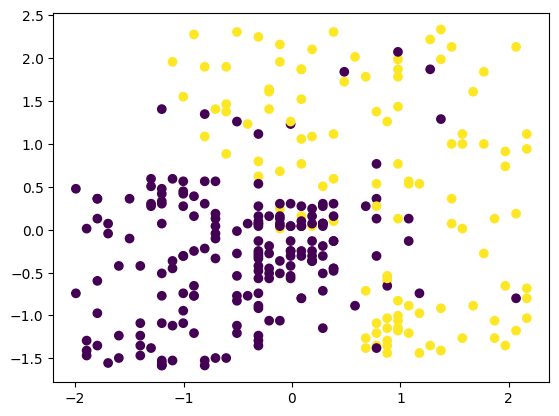

In [25]:
plt.scatter(X_Train[:, 1], X_Train[:, 2], c=Y_Train)
plt.d  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()

plt.scatter(X_Test[:, 1], X_Test[:, 2],c=Y_Test)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Salary (Actual)')
plt.show()

plt.scatter(X_Test[:, 1], X_Test[:, 2], c=Y_Pred)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Salary (Predicted)')
plt.show()
